# TeleComeChurn Assignment

## 1) Import Required Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## 2) Load Data and Understanding Data

In [2]:
data=pd.read_csv('telecom_churn_data.csv')
print(data.shape)
data.head()

(99999, 226)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

## 3) Data Preprocessing 

### Featuring Engineering and Handling Missing Values
#### Handling Unique and Non-Unique Values

In [3]:
cols_with_only_one_value=[]
for i in data.columns:
    if data[i].nunique() == 1:
        cols_with_only_one_value.append(i)
data.drop(cols_with_only_one_value, axis=1, inplace=True)

In [4]:
size=data.shape[0]
cols_with_missing_values=[]
for i in data.columns:
    coun=data[i].isnull().sum()
    if coun*100/size>50:
        cols_with_missing_values.append(i)
print('Totl Cols: ',data.shape[1], 'Missing Cols: ',len(cols_with_missing_values))

Totl Cols:  210 Missing Cols:  40


##### Handling Null Values, Cols to Neglect After Filetering High Valued Customers

In [5]:
mnths=[6,7,8,9]
# after finding high values customers these cols will be mostly of no use so we can remove later after calculating
high_valued_cust_neg_cols=[]
lop=True
for each in range(data.shape[0]):
    for i in mnths:
        if pd.isnull(data[f'total_rech_data_{i}'][each]) and pd.isnull(data[f'max_rech_data_{i}'][each]):
            data.loc[each,f'total_rech_data_{i}']=0
            data.loc[each,f'max_rech_data_{i}']=0
            data.loc[each,f'av_rech_amt_data_{i}']=0
        if lop and (i in [6,7]):
            high_valued_cust_neg_cols.extend([f'total_rech_data_{i}', f'max_rech_data_{i}', f'av_rech_amt_data_{i}'])
    lop=False

high_valued_cust_neg_cols

['total_rech_data_6',
 'max_rech_data_6',
 'av_rech_amt_data_6',
 'total_rech_data_7',
 'max_rech_data_7',
 'av_rech_amt_data_7']

##### From the above data we can see that the count_rech_* related columns are the sum of the total_rech_data_* as we can neglect it

In [6]:
neglect_cols=['count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7',
              'count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9']
data.drop(neglect_cols, axis=1, inplace=True)

Plot for Month-6


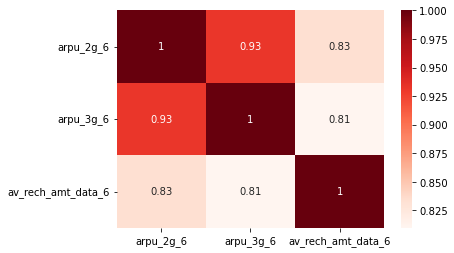

Plot for Month-7


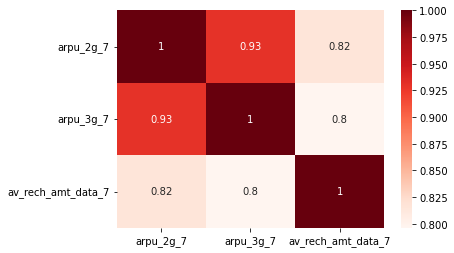

Plot for Month-8


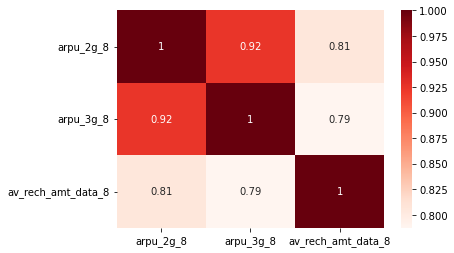

Plot for Month-9


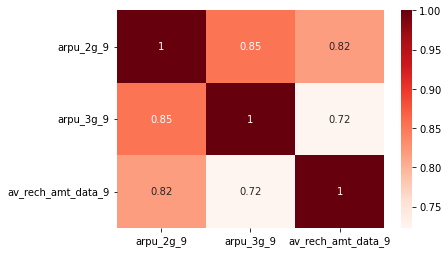

In [7]:
avg_rpu=[]
for i in mnths:
    print(f'Plot for Month-{i}')
    avg_rpu.append(f'arpu_2g_{i}')
    avg_rpu.append(f'arpu_3g_{i}')
    sns.heatmap(data[[f'arpu_2g_{i}',f'arpu_3g_{i}',f'av_rech_amt_data_{i}']].corr(),annot=True,cmap='Reds')
    plt.show()

##### From the plot we can see that three are corelated and one can be considered which is av_rech_amt_data_*

In [8]:
print('Before :',len(data.columns))
data.drop(avg_rpu, axis=1, inplace=True)
print('After :',len(data.columns))

Before : 202
After : 194


##### Removing Cols With more than 50% of missing values and datetime related cols as those wont add much value for this case

In [9]:
print('Before :',len(data.columns))
size=data.shape[0]
cols_with_missing_values=[]
for i in data.columns:
    coun=data[i].isnull().sum()
    if coun*100/size>50 or 'date' in i:
        cols_with_missing_values.append(i)
data.drop(cols_with_missing_values, axis=1, inplace=True)
print('After :',len(data.columns), 'Removed ColCount',len(cols_with_missing_values))

Before : 194
After : 178 Removed ColCount 16


In [10]:
data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.0,0.0,0.00,1.83,0.00,0.0,0.00,0.00,

##### Fileter High Valued Customer

In [11]:
# Consider total_rech_amt of 6 and 7 month with 70 percentile as hight valued customers
# where total_rech_amt=av_rech_amt_data*total_rech_data+total_rech_amt
print('Before: ',data.shape)
data['total_rech_amt6']=data['av_rech_amt_data_6'] * data['total_rech_data_6']+ data['total_rech_amt_6']
data['total_rech_amt7']=data['av_rech_amt_data_7'] * data['total_rech_data_7'] + data['total_rech_amt_7']
data['avg_rech_amt'] = (data['total_rech_amt6'] + data['total_rech_amt7'])/2

# cutoff is the 70th percentile of the average recharge amount in the first two months 6,7
cut_off = data['avg_rech_amt'].quantile(0.7)
data = data[data['avg_rech_amt'] >= cut_off]

data.drop(high_valued_cust_neg_cols, axis=1, inplace=True)

print('After: ',data.shape)

Before:  (99999, 178)
After:  (30001, 175)


In [12]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
cols=data.columns.to_list()
# Calling the Scaling function
scalar = MinMaxScaler()

# Scaling and transforming the data for the columns that are numerical
data[cols]=scalar.fit_transform(data[cols])

# Calling the KNN Imputer function
knn=KNNImputer(n_neighbors=3)

# Imputing the NaN values using KNN Imputer
# start_time=time.time()

data2 = pd.DataFrame(knn.fit_transform(data[cols]))
data2.columns=data[cols].columns
data[cols]=scalar.inverse_transform(data2)


### Handling missing values by Sklearn.
###### There are two ways to impute missing values considering the multivariate approach. Using KNNImputer or IterativeImputer classes.

In [13]:
# cols=data.columns
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# impute_it = IterativeImputer()
# da=pd.DataFrame(impute_it.fit_transform(data))
# da.columns=cols
data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_8,total_rech_data_9,max_rech_data_8,max_rech_data_9,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt6,total_rech_amt7,avg_rech_amt
0,7.000843e+09,197.385,214.816,213.803,21.100,53.27,24.613333,0.00,33.590000,84.23,23.993333,0.00,27.833333,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,53.27,24.613333,0.00,33.206667,79.27,18.196667,0.00,24.193333,0.403333,4.813333,0.00,2.69,0.353333,0.0,0.00,0.243333,132.953333,47.636667,0.00,60.096667,0.00,0.00,0.00,0.383333,0.41,0.976667,0.00,0.943333,0.00,0.00,0.00,0.00,0.41,0.976667,0.00,1.326667,0.0,0.00,0.00,0.000000,4.14,0.326667,0.00,0.663333,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,44.493333,13.396667,0.16,32.263333,69.183333,62.85,4.13,38.553333,17.74,22.503333,1.15,11.360000,131.433333,98.76,5.44,82.186667,0.00,3.366667,0.00,0.000000,0.583333,0.37,0.00,1.456667,1.243333,1.113333,0.00,1.656667,1.826667,4.853333,0.00,3.116667,0.00,0.00,5.44,0.00,0.043333,0.0,0.0,0.093333,0.00,0.00,0.00,0.00,0.00,0.55,0.00,0.203333,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,0.0,252.0,0.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,614.0,504.0,559.0
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.84,54.680000,52.29,65.276667,453.43,567.160000,325.91,172.050000,16.23,33.49,31.64,4.776667,23.74,12.59,38.06,7.876667,51.39,31.380000,40.28,43.380000,308.63,447.380000,162.28,100.190000,62.130000,55.140000,53.23,4.03,0.000000,0.0,0.00,0.000000,422.160000,533.910000,255.79,147.603333,4.30,23.29,12.01,21.89

In [14]:
((data.isnull().sum()/data.shape[0])*100).round(2).sort_values(ascending=False)

mobile_number         0.0
ic_others_9           0.0
spl_ic_mou_9          0.0
isd_ic_mou_6          0.0
isd_ic_mou_7          0.0
isd_ic_mou_8          0.0
isd_ic_mou_9          0.0
ic_others_6           0.0
ic_others_7           0.0
ic_others_8           0.0
total_rech_num_6      0.0
spl_ic_mou_7          0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_num_9      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
spl_ic_mou_8          0.0
spl_ic_mou_6          0.0
max_rech_amt_8        0.0
std_ic_t2f_mou_7      0.0
std_ic_t2t_mou_7      0.0
std_ic_t2t_mou_8      0.0
std_ic_t2t_mou_9      0.0
std_ic_t2m_mou_6      0.0
std_ic_t2m_mou_7      0.0
std_ic_t2m_mou_8      0.0
std_ic_t2m_mou_9      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2f_mou_8      0.0
total_ic_mou_9        0.0
std_ic_t2f_mou_9      0.0
std_ic_mou_6          0.0
std_ic_mou_7          0.0
std_ic_mou_8          0.0
std_ic_mou_9

### TargetVariable Creation: Tag churners and remove attributes of the churn phase

In [15]:
#Tag Chrners Cols: total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9
cols=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
print(data[cols].info())
data['Churn']=np.where(data[cols].sum(axis=1) == 0, 1, 0)
data[cols+['Churn']].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30001 non-null  float64
 1   total_og_mou_9  30001 non-null  float64
 2   vol_2g_mb_9     30001 non-null  float64
 3   vol_3g_mb_9     30001 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB
None


,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,Churn
0,0.00,0.00,0.00,0.00,1
7,0.00,0.00,0.00,0.00,1
8,34.91,142.18,0.00,0.00,0
21,252.61,1031.53,0.00,0.00,0
23,127.48,127.63,13.93,314.74,0


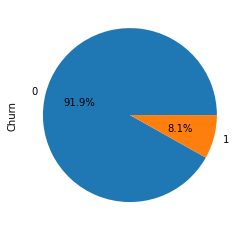

In [16]:
data['Churn'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [17]:
# FROM THE ABOVE PLOT WE CAN SEE THAT 92.8% OF USERS ARE SUPPOSED TO BE RETENT AND 7.2% ARE CHURN.
# SO AS WE HAD THE CHURN OR RETENT WE CAN REMOVE PHASE-9.

print('Before: ',data.shape)
cols_required=[]
for i in data.columns:
    if '_9' not in i:
        cols_required.append(i)
data=data[cols_required]
print('After: ',data.shape)


Before:  (30001, 176)
After:  (30001, 133)


In [18]:
dataaa=data.copy()

In [19]:
data=dataaa.copy()

##### Removing Collinear Data Columns

In [20]:
cor_matrix = data.corr().abs()
corr = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(corr)

                    mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  \
mobile_number                 NaN  0.033944  0.029496  0.034570     0.009805   
arpu_6                        NaN       NaN  0.671732  0.612617     0.340238   
arpu_7                        NaN       NaN       NaN  0.759858     0.213292   
arpu_8                        NaN       NaN       NaN       NaN     0.152769   
onnet_mou_6                   NaN       NaN       NaN       NaN          NaN   
onnet_mou_7                   NaN       NaN       NaN       NaN          NaN   
onnet_mou_8                   NaN       NaN       NaN       NaN          NaN   
offnet_mou_6                  NaN       NaN       NaN       NaN          NaN   
offnet_mou_7                  NaN       NaN       NaN       NaN          NaN   
offnet_mou_8                  NaN       NaN       NaN       NaN          NaN   
roam_ic_mou_6                 NaN       NaN       NaN       NaN          NaN   
roam_ic_mou_7                 NaN       

In [21]:
print('Before: ',data.shape,'\n'*3)
to_drop = [column for column in corr.columns if any(corr[column] > 0.85) or any(corr[column] < -0.85) ]
print('CollinearCols: ',to_drop, 'CollinearCount: ', len(to_drop),'\n'*3)
data.drop(to_drop, axis=1, inplace=True)
print('After: ',data.shape)

Before:  (30001, 133) 



CollinearCols:  ['std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'sachet_2g_8', 'avg_rech_amt'] CollinearCount:  15 



After:  (30001, 118)


##### Deriving New Variables tenure

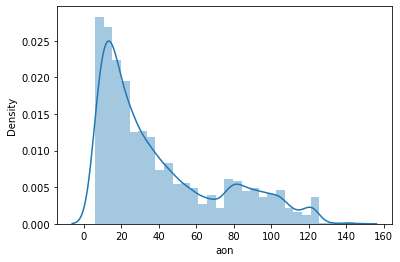

In [22]:
data['aon'] = (data['aon']/30).round(0)
sns.distplot(data['aon'],bins=30)
plt.show()

In [23]:
months = [0, 6, 12, 24, 60, 61]
range_of_months = [  '0.6M', '6.12M', '12.24M', '24.60M', '60+M']
data['tenure'] = pd.cut(data['aon'], months, labels=range_of_months)
data['tenure'].head()

0     24.60M
7     24.60M
8      6.12M
21    12.24M
23    12.24M
Name: tenure, dtype: category
Categories (5, object): ['0.6M' < '6.12M' < '12.24M' < '24.60M' < '60+M']

0     24.60M
7     24.60M
8      6.12M
21    12.24M
23    12.24M
Name: tenure, dtype: category
Categories (5, object): ['0.6M' < '6.12M' < '12.24M' < '24.60M' < '60+M']


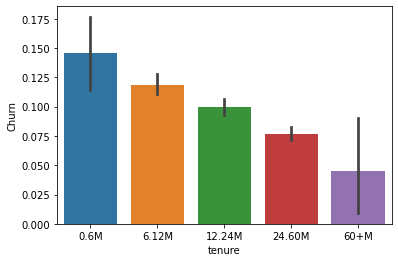

In [24]:
sns.barplot(x='tenure',y='Churn', data=data)
print(data['tenure'].head())
plt.show()


##### Note:- We can see that max churn happens in 0-6 months and less in 60+ which means more than 5yrs customers
##### and also we can note that the 6 and 7 th are good phase so we can combine arpu_6 and arpu_7

In [25]:
data["arpu_67"]= (data["arpu_6"]+data["arpu_7"])/2
data["arpu_67"].head()
data.drop(['arpu_6','arpu_7'], axis=1, inplace=True)
print(data[['tenure','arpu_67','Churn']].head())

    tenure    arpu_67  Churn
0   24.60M   206.1005      1
7   24.60M  1209.5150      1
8    6.12M   435.4720      0
21  12.24M   556.1030      0
23  12.24M   134.1235      0


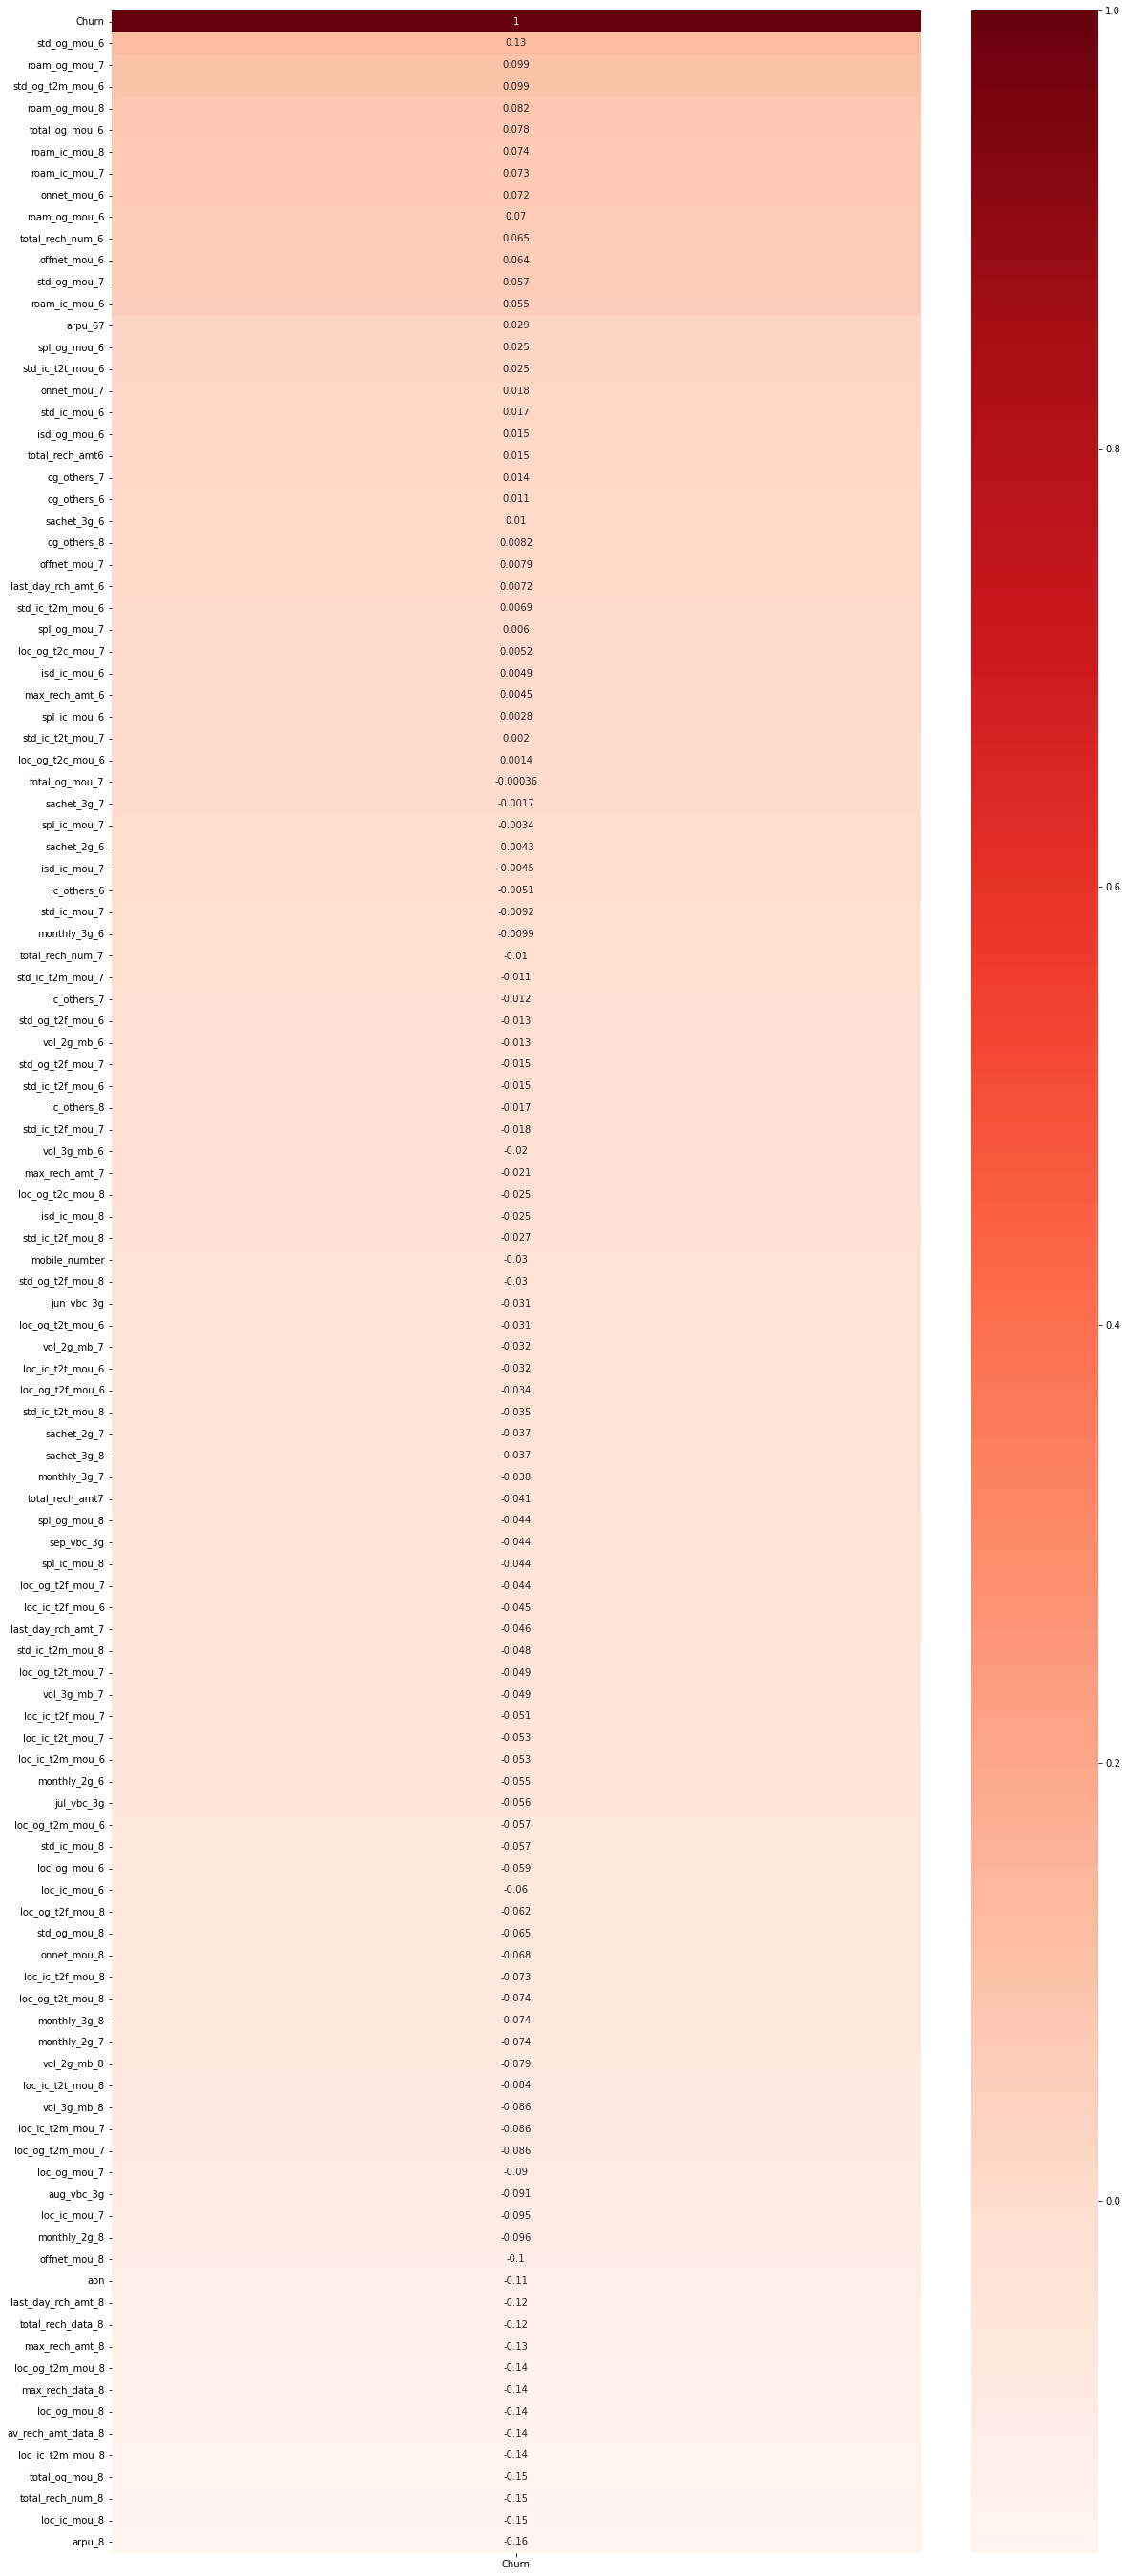

<Figure size 432x288 with 0 Axes>

In [26]:
f = plt.figure()
f.set_figwidth(19)
f.set_figheight(49)
sns.heatmap(data.corr()[['Churn']].sort_values('Churn' ,ascending=False), annot=True,cmap='Reds')
f = plt.figure()
plt.show()


##### Note:-We can see that :
###### avg outgoing calls and calls on romaning for 6 and 7th months are having positively correlation with churn
###### avg revenue, no. of recharge for 8th month has negative correlation with respective to churn.

    tenure  Churn
0   24.60M      1
7   24.60M      1
8    6.12M      0
21  12.24M      0
23  12.24M      0


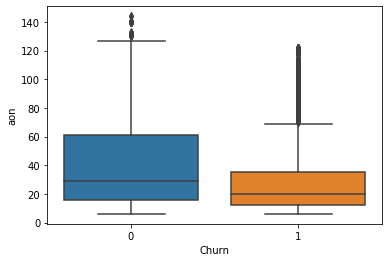

In [27]:
print(data[['tenure','Churn']].head())
sns.boxplot(x = data.Churn, y = data.aon)

plt.show()

##### Note:  From this below plot we can see that the users who avail services are the mostly tenured .

#### Categorizing avg revenue, no. of recharge for 8th month has negative correlation with respective to churn.

##### Before Categorizing total_rech_data_8 and total_rech_num_8

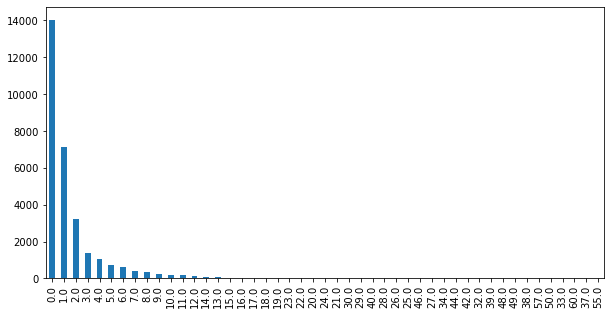

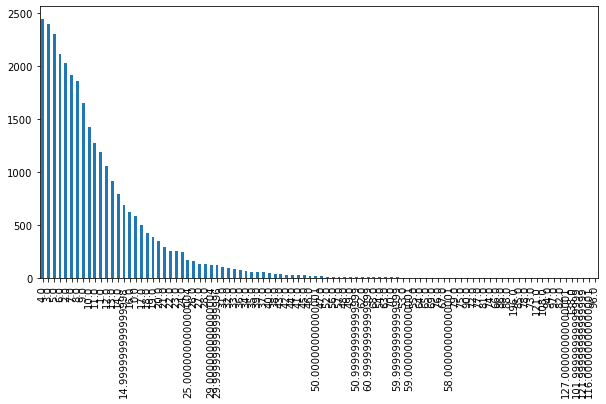

In [28]:
f=plt.figure()
f.set_figheight(5)
f.set_figwidth(10)
data['total_rech_data_8'].value_counts().plot.bar()
plt.show()
f=plt.figure()
f.set_figheight(5)
f.set_figwidth(10)
data['total_rech_num_8'].value_counts().plot.bar()
plt.show()

In [29]:
data['total_rech_data_8']=pd.cut(data['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
data['total_rech_num_8']=pd.cut(data['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

In [30]:
data[['total_rech_data_8','total_rech_num_8']].head()

,total_rech_data_8,total_rech_num_8
0,<=10_Recharges,<=10_Recharges
7,No_Recharge,<=10_Recharges
8,<=10_Recharges,10-25_Recharges
21,No_Recharge,>25_Recharges
23,<=10_Recharges,<=10_Recharges


##### After Categorizing total_rech_data_8 and total_rech_num_8

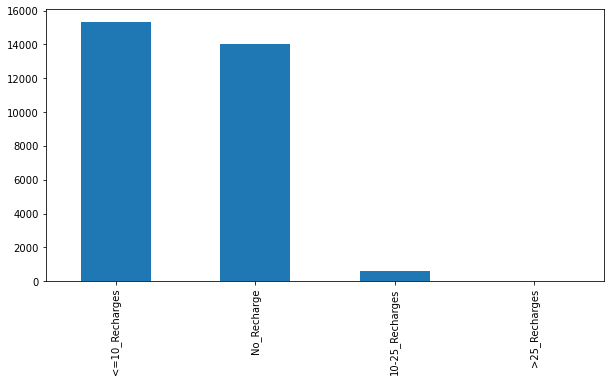

<AxesSubplot:>

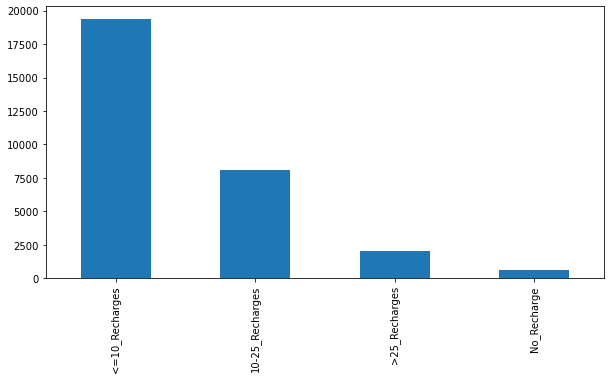

In [31]:
f=plt.figure()
f.set_figheight(5)
f.set_figwidth(10)
data['total_rech_data_8'].value_counts().plot.bar()
plt.show()
f=plt.figure()
f.set_figheight(5)
f.set_figwidth(10)
data['total_rech_num_8'].value_counts().plot.bar()

##### Comparing  total_rech_data_8 and total_rech_num_8 with churn

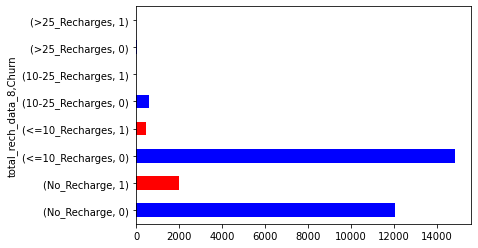

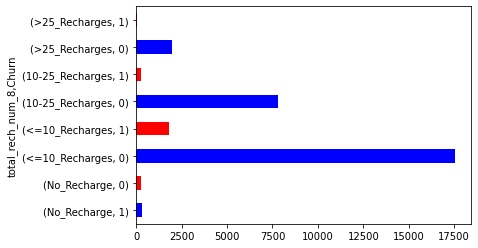

In [32]:
data.groupby(by='total_rech_data_8')['Churn'].value_counts().plot.barh(color=['b','r'])
plt.show()
data.groupby(by='total_rech_num_8')['Churn'].value_counts().plot.barh(color=['b','r'])
plt.show()
# Here by this Below plots we can see as the number of rech rate increases, the churn rate getting decreased.

##### Using One-Hot-encoding for creating dummies 

In [33]:
data.shape

(30001, 118)

In [34]:
cols=['total_rech_data_8','total_rech_num_8','tenure']
dummy = pd.get_dummies(data[cols], drop_first=True)
data = pd.concat([data, dummy], axis=1)
data.drop(cols,axis=1,inplace=True)
data = data.dropna()
data = data.reset_index(drop = True)
data.head()

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt6,total_rech_amt7,Churn,arpu_67,total_rech_data_8_<=10_Recharges,total_rech_data_8_10-25_Recharges,total_rech_data_8_>25_Recharges,total_rech_num_8_<=10_Recharges,total_rech_num_8_10-25_Recharges,total_rech_num_8_>25_Recharges,tenure_6.12M,tenure_12.24M,tenure_24.60M,tenure_60+M
0,7.000843e+09,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.613333,0.00,79.27,18.196667,0.00,0.403333,4.813333,0.00,0.353333,0.0,0.00,132.953333,47.636667,0.00,0.41,0.00,0.00,0.00,0.41,0.976667,0.00,0.0,4.14,0.326667,0.00,0.0,0.0,0.0,0.00,0.00,0.00,44.493333,13.396667,0.16,69.183333,62.85,4.13,17.74,22.503333,1.15,131.433333,98.76,5.44,0.00,3.366667,0.00,0.583333,0.37,0.00,1.243333,1.113333,0.00,1.826667,4.853333,0.00,0.043333,0.0,0.0,0.00,0.00,0.00,0.00,0.55,0.00,4.0,3.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,32.0,30.40,0.00,101.20,3.58,614.0,504.0,1,206.1005,1,0,0,1,0,0,0,0,1,0
1,7.000702e+09,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.380000,40.28,308.63,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.0,0.00,422.160000,533.910000,255.79,49.89,6.66,20.08,16.68,60.86,75.140000,77.84,0.0,4.50,0.000000,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.49,121.19,152.16,101.460000,39.53,427.880000,355.23,188.04,36.89,11.830000,30.39,91.440000,126.99,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,0.210000,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,57.74,19.38,18.74,0.00,1580.0,790.0,1,1209.5150,0,0,0,1,0,0,0,0,1,0
2,7.001525e+09,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.590000,12.49,80.96,70.580000,50.54,0.000000,0.000000,0.00,0.000000,0.0,7.15,378.090000,288.180000,63.04,13.69,0.00,0.00,0.00,130.26,143.480000,98.28,0.0,0.00,0.000000,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.840000,9.840000,0.31,57.580000,13.98,15.48,0.00,0.000000,0.00,81.430000,23.83,15.79,0.00,0.580000,0.10,22.430000,4.08,0.65,0.000000,0.000000,0.00,22.430000,4.660000,0.75,0.000000,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,90.0,154.0,30.0,50.0,0.0,10.0,23.0,69.0,0.00,356.00,0.03,0.00,750.95,1

In [35]:
datsss=data.copy()

In [36]:
data=datsss.copy()
data.drop(['mobile_number','sep_vbc_3g'], axis=1, inplace=True)

## 4) Train Split Data

In [37]:
y=data.pop('Churn')
X=data

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print( X_train.shape)
print( X_test.shape)

(21000, 122)
(9001, 122)


In [39]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 4788 to 29733
Data columns (total 122 columns):
 #    Column                             Dtype  
---   ------                             -----  
 0    arpu_8                             float64
 1    onnet_mou_6                        float64
 2    onnet_mou_7                        float64
 3    onnet_mou_8                        float64
 4    offnet_mou_6                       float64
 5    offnet_mou_7                       float64
 6    offnet_mou_8                       float64
 7    roam_ic_mou_6                      float64
 8    roam_ic_mou_7                      float64
 9    roam_ic_mou_8                      float64
 10   roam_og_mou_6                      float64
 11   roam_og_mou_7                      float64
 12   roam_og_mou_8                      float64
 13   loc_og_t2t_mou_6                   float64
 14   loc_og_t2t_mou_7                   float64
 15   loc_og_t2t_mou_8                   float64
 16  

In [40]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [41]:
X_train=X_train[num_col]

## 5) Scaling The Data

In [42]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [43]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt6,total_rech_amt7,arpu_67
4788,0.038904,0.000235,0.000531,0.000238,0.004211,0.003651,0.004095,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000269,0.000585,0.000238,0.007005,0.006330,0.015246,0.003075,0.000000,0.000980,0.000000,0.010426,0.006708,0.003471,0.004240,0.005214,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.006292,0.002472,0.000000,0.0,0.0,0.003461,0.003487,0.004268,0.004415,0.005650,0.012348,0.014898,0.012389,0.018297,0.001078,0.003333,0.000000,0.013386,0.014004,0.024154,0.000000,0.000000,0.000000,0.001320,0.000000,0.000000,0.0,0.00000,0.0,0.001119,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.009772,0.050725,0.038404,0.038404,0.034615,0.038404,0.038404,0.034615,0.099035,0.037922,0.003367,0.026477,0.021871,0.000000,0.000000,0.000000,0.25,0.25,0.2,0.000000,0.041667,0.0,0.000000,0.0000,0.0,0.000000,0.0,0.565217,0.000000,0.000000,0.0,0.003420,0.015354,0.063393
8447,0.032921,0.000493,0.000000,0.000000,0.001631,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000566,0.000000,0.000000,0.002533,0.000000,0.000000,0.002454,0.000000,0.000000,0.000000,0.000000,0.000000,0.001624,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.001620,0.000000,0.000000,0.013088,0.007020,0.003657,0.041620,0.021697,0.014587,0.013215,0.008694,0.000000,0.040335,0.022862,0.014662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00209,0.0,0.000000,0.000316,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.055375,0.108696,0.009227,0.009227,0.008316,0.009227,0.005985,0.005619,0.016077,0.034967,0.064367,0.045634,0.035909,0.000332,0.000000,0.000000,0.00,0.00,0.0,0.166667,0.083333,0.0,0.000000,0.0000,0.0,0.057143,0.0,0.275362,0.000000,0.000000,0.0,0.009431,0.020687,0.068877
4535,0.033826,0.000876,0.000275,0.000714,0.003861,0.007485,0.003679,0.0,0.000000,0.0,0.0,0.00000,0.0,0.001004,0.000303,0.000714,0.006148,0.016108,0.014527,0.000000,0.000529,0.000000,0.000000,0.000000,0.000000,0.003339,0.009721,0.005363,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.016453,0.002701,0.000000,0.000000,0.0,0.0,0.004159,0.006833,0.004216,0.000183,0.001511,0.010736,0.037515,0.033858,0.025755,0.000465,0.005804,0.019112,0.023883,0.024957,0.034700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0

##### Synthetic Minority Oversampling TEchnique

In [44]:
from imblearn.over_sampling import SMOTE
smte = SMOTE(random_state=42)
X_train_sm,y_train_sm = smte.fit_resample(X_train,y_train)

## 6) Modeling
#### Simple Model

In [45]:
# Logistic regression model
import statsmodels.api as sm
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38463
Model Family:                Binomial   Df Model:                          112
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13621.
Date:                Tue, 17 Jan 2023   Deviance:                       27243.
Time:                        19:16:29   Pearson chi2:                 9.25e+15
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4934
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6677      0.111      6.032      0.000       0.451       0.885
arpu_8                -0.6484      1.724     -0.376      0.707      -4.027       2.730
onnet_mou_6          -49.3848     26.450     -1.867      0.062    -101.227       2.457
onnet_mou_7           19.3967     15.931      1.218      0.223     -11.828      50.621
onnet_mou_8          303.1781     23.177     13.081      0.000     257.752     348.605
offnet_mou_6         -45.5377     29.822     -1.527      0.127    -103.988      12.912
offnet_mou_7          25.1718     18.832      1.337      0.181     -11.738      62.081
offnet_mou_8         390.9135     30.149     12.966      0.000     331.822     450.005
roam_ic_mou_6          2.8124      0.817      3.442      0.001       1.211       4.414
roam_ic_mou_7          2.9465      1.486      1.983      0.047       0.034       5.859
roam_ic_mou_8         -0.7429      0.743     -1.000      0.317      -2.199       0.713
roam_og_mou_6         20.3123     13.510      1.503      0.133      -6.167      46.792
roam_og_mou_7         -1.9069      3.729     -0.511      0.609      -9.215       5.401
roam_og_mou_8        -97.8443      7.484    -13.074      0.000    -112.513     -83.176
loc_og_t2t_mou_6     1.52e+04      2e+04      0.760      0.447    -2.4e+04    5.44e+04
loc_og_t2t_mou_7    -2.51e+04    2.3e+04     -1.090      0.276   -7.03e+04    2.01e+04
loc_og_t2t_mou_8    2.106e+05   3.48e+04      6.052      0.000    1.42e+05    2.79e+05
loc_og_t2m_mou_6    1.117e+04   1.47e+04      0.760      0.447   -1.76e+04       4e+04
loc_og_t2m_mou_7   -1.512e+04   1.39e+04     -1.090      0.276   -4.23e+04    1.21e+04
loc_og_t2m_mou_8    6.947e+04   1.15e+04      6.052      0.000     4.7e+04     9.2e+04
loc_og_t2f_mou_6    1596.4412   2102.793      0.759      0.448   -2524.956    5717.839
loc_og_t2f_mou_7   -3601.1631   3293.699     -1.093      0.274   -1.01e+04    2854.368
loc_og_t2f_mou_8    1.819e+04   3004.741      6.054      0.000    1.23e+04    2.41e+04
loc_og_t2c_mou_6      -5.8693      1.099     -5.340      0.000      -8.024      -3.715
loc_og_t2c_mou_7       1.3274      2.039      0.651      0.515      -2.670       5.325
loc_og_t2c_mou_8      -1.7556      1.307     -1.343      0.179      -4.318       0.807
loc_og_mou_6       -2.504e+04   3.31e+04     -0.757      0.449   -8.99e+04    3.98e+04
loc_og_mou_7        2.604e+04   2.39e+04      1.090      0.276   -2.08e+04    7.29e+04
loc_og_mou_8       -2.162e+05   3.57e+04     -6.052      0.000   -2.86e+05   -1.46e+05
std_og_t2m_mou_6     -11.0963      3.749     -2.960      0.003     -18.445      -3.748
std_og_t2f_mou_6      -1.1491      1.565     -0.734      0.463      -4.217       1.918
std_og_t2f_mou_7       0.6889      1.844      0.374      0.709      -2.925       4.302
std_og_t2f_mou_8      -9.5748      2.8

##### RFE

In [46]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

rfe = RFE(estimator=logreg, n_features_to_select=20)             
rfe = rfe.fit(X_train_sm, y_train_sm)
rfe_cols=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_cols)

The selected columns by RFE for modelling are: 

 Index(['arpu_8', 'onnet_mou_7', 'offnet_mou_7', 'roam_og_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'max_rech_amt_6',
       'last_day_rch_amt_8', 'av_rech_amt_data_8', 'vol_2g_mb_8',
       'monthly_2g_8', 'aug_vbc_3g', 'arpu_67'],
      dtype='object')


In [47]:
# Training the model with the edited feature list
# NOTE:- A p-value higher than 0.05 (> 0.05) is not statistically significant so we are going to remove those cols and do modeling.
X_train_SM = sm.add_constant(X_train_sm[rfe_cols])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38555
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15865.
Date:                Tue, 17 Jan 2023   Deviance:                       31731.
Time:                        19:17:31   Pearson chi2:                 3.35e+11
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4309
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3169      0.069      4.564      0.000       0.181       0.453
arpu_8               -14.9398      1.301    -11.480      0.000     -17.490     -12.389
onnet_mou_7            6.5547      0.444     14.748      0.000       5.684       7.426
offnet_mou_7           7.0788      0.488     14.497      0.000       6.122       8.036
roam_og_mou_8          4.8549      0.581      8.351      0.000       3.715       5.994
loc_og_t2m_mou_8      -1.1408      1.066     -1.070      0.285      -3.230       0.949
loc_og_mou_8         -13.4393      2.255     -5.960      0.000     -17.859      -9.020
total_og_mou_8       -23.0260      0.983    -23.433      0.000     -24.952     -21.100
loc_ic_t2t_mou_8       1.8281      4.056      0.451      0.652      -6.121       9.777
loc_ic_t2m_mou_6       7.2173      0.620     11.648      0.000       6.003       8.432
loc_ic_t2m_mou_8     -10.0372      4.465     -2.248      0.025     -18.788      -1.287
loc_ic_mou_8         -24.6339      4.948     -4.978      0.000     -34.333     -14.935
std_ic_mou_8         -13.8971      1.450     -9.585      0.000     -16.739     -11.056
spl_ic_mou_8         -20.6243      1.378    -14.963      0.000     -23.326     -17.923
max_rech_amt_6         5.0669      0.450     11.265      0.000       4.185       5.948
last_day_rch_amt_8   -13.8238      0.758    -18.228      0.000     -15.310     -12.337
av_rech_amt_data_8   -11.8530      0.625    -18.967      0.000     -13.078     -10.628
vol_2g_mb_8          -17.4780      1.024    -17.075      0.000     -19.484     -15.472
monthly_2g_8          -4.8702      0.366    -13.304      0.000      -5.588      -4.153
aug_vbc_3g            -5.2545      0.591     -8.896      0.000      -6.412      -4.097
arpu_67               19.3099      1.152     16.762      0.000      17.052      21.568
======================================================================================
"""

In [48]:
# From the p-value of the individual columns, we can drop the column 'loc_ic_t2t_mou_8' as it has high p-value of 6.00
rfe_cols_one=rfe_cols.drop('loc_ic_t2t_mou_8',1)
print("\nThe new set of edited featured are:\n",rfe_cols_one)


The new set of edited featured are:
 Index(['arpu_8', 'onnet_mou_7', 'offnet_mou_7', 'roam_og_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'spl_ic_mou_8', 'max_rech_amt_6', 'last_day_rch_amt_8',
       'av_rech_amt_data_8', 'vol_2g_mb_8', 'monthly_2g_8', 'aug_vbc_3g',
       'arpu_67'],
      dtype='object')


In [49]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_cols_one])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38556
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15865.
Date:                Tue, 17 Jan 2023   Deviance:                       31731.
Time:                        19:17:31   Pearson chi2:                 3.38e+11
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4309
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3164      0.069      4.557      0.000       0.180       0.452
arpu_8               -14.9273      1.301    -11.474      0.000     -17.477     -12.377
onnet_mou_7            6.5552      0.444     14.749      0.000       5.684       7.426
offnet_mou_7           7.0774      0.488     14.494      0.000       6.120       8.034
roam_og_mou_8          4.8561      0.581      8.352      0.000       3.717       5.996
loc_og_t2m_mou_8      -1.1722      1.063     -1.103      0.270      -3.256       0.911
loc_og_mou_8         -13.3555      2.244     -5.950      0.000     -17.754      -8.956
total_og_mou_8       -23.0229      0.983    -23.431      0.000     -24.949     -21.097
loc_ic_t2m_mou_6       7.2172      0.620     11.647      0.000       6.003       8.432
loc_ic_t2m_mou_8     -11.7638      2.275     -5.172      0.000     -16.222      -7.306
loc_ic_mou_8         -22.5832      1.912    -11.812      0.000     -26.331     -18.836
std_ic_mou_8         -13.9099      1.450     -9.594      0.000     -16.752     -11.068
spl_ic_mou_8         -20.6178      1.378    -14.959      0.000     -23.319     -17.916
max_rech_amt_6         5.0597      0.449     11.258      0.000       4.179       5.941
last_day_rch_amt_8   -13.8336      0.758    -18.250      0.000     -15.319     -12.348
av_rech_amt_data_8   -11.8575      0.625    -18.979      0.000     -13.082     -10.633
vol_2g_mb_8          -17.4761      1.024    -17.074      0.000     -19.482     -15.470
monthly_2g_8          -4.8726      0.366    -13.312      0.000      -5.590      -4.155
aug_vbc_3g            -5.2634      0.590     -8.915      0.000      -6.421      -4.106
arpu_67               19.3170      1.152     16.771      0.000      17.059      21.575
======================================================================================
"""

In [50]:
# From the p-value of the individual columns, we can drop the column 'loc_og_t2m_mou_8' as it has high p-value of 0.27
rfe_cols_two=rfe_cols.drop('loc_og_t2m_mou_8',1)
print("\nThe new set of edited featured are:\n",rfe_cols_one)


The new set of edited featured are:
 Index(['arpu_8', 'onnet_mou_7', 'offnet_mou_7', 'roam_og_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'spl_ic_mou_8', 'max_rech_amt_6', 'last_day_rch_amt_8',
       'av_rech_amt_data_8', 'vol_2g_mb_8', 'monthly_2g_8', 'aug_vbc_3g',
       'arpu_67'],
      dtype='object')


In [51]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_cols_two])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38556
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15866.
Date:                Tue, 17 Jan 2023   Deviance:                       31732.
Time:                        19:17:32   Pearson chi2:                 3.32e+11
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4309
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3212      0.069      4.631      0.000       0.185       0.457
arpu_8               -15.0012      1.301    -11.530      0.000     -17.551     -12.451
onnet_mou_7            6.6420      0.437     15.184      0.000       5.785       7.499
offnet_mou_7           7.0542      0.487     14.473      0.000       6.099       8.009
roam_og_mou_8          4.8681      0.581      8.374      0.000       3.729       6.008
loc_og_mou_8         -15.3882      1.377    -11.178      0.000     -18.086     -12.690
total_og_mou_8       -23.0659      0.983    -23.471      0.000     -24.992     -21.140
loc_ic_t2t_mou_8       2.1130      4.050      0.522      0.602      -5.824      10.050
loc_ic_t2m_mou_6       7.2056      0.619     11.638      0.000       5.992       8.419
loc_ic_t2m_mou_8     -10.5149      4.448     -2.364      0.018     -19.233      -1.796
loc_ic_mou_8         -24.4820      4.953     -4.943      0.000     -34.190     -14.774
std_ic_mou_8         -13.8697      1.450     -9.568      0.000     -16.711     -11.029
spl_ic_mou_8         -20.6042      1.378    -14.951      0.000     -23.305     -17.903
max_rech_amt_6         5.0721      0.450     11.278      0.000       4.191       5.954
last_day_rch_amt_8   -13.8271      0.758    -18.233      0.000     -15.313     -12.341
av_rech_amt_data_8   -11.8444      0.625    -18.954      0.000     -13.069     -10.620
vol_2g_mb_8          -17.4605      1.023    -17.064      0.000     -19.466     -15.455
monthly_2g_8          -4.8726      0.366    -13.311      0.000      -5.590      -4.155
aug_vbc_3g            -5.2383      0.590     -8.873      0.000      -6.395      -4.081
arpu_67               19.2610      1.151     16.735      0.000      17.005      21.517
======================================================================================
"""

In [52]:
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

In [53]:
# CONFUSION METRICS
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)
print("The Accuracy of Model:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

[[15672  3616]
 [ 2511 16777]]
The Accuracy of Model: 0.8411706760680215


##### VIF(VARIANCE INFLATION FACTOR)

In [54]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_cols_two].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_cols_two].values, i) for i in range(X_train_sm[rfe_cols_two].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,loc_ic_mou_8,82.65
8,loc_ic_t2m_mou_8,42.92
6,loc_ic_t2t_mou_8,18.76
0,arpu_8,17.28
18,arpu_67,13.25
5,total_og_mou_8,6.10
2,offnet_mou_7,2.82
12,max_rech_amt_6,2.66
1,onnet_mou_7,2.48
7,loc_ic_t2m_mou_6,2.39


## 7) Confusion Matrics and Calculation of AUC using ROC Curve

In [55]:
def confuse_matrix(confus):
    TP = confus[1,1]  
    TN = confus[0,0]
    FP = confus[0,1] 
    FN = confus[1,0]
    print("Sens:",TP / float(TP+FN))
    print("Spec:",confusion[0,0]  / float(TN+FP))
    print("FPR:",FP/ float(TN+FP))
    print ("Prec:",TP / float(TP+FP))
    print ("TNR:",TN / float(TN+ FN))
    return None
def calc_auc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    return auc_score

In [56]:
confuse_matrix(confusion)

Sens: 0.8698154292824554
Spec: 0.8125259228535877
FPR: 0.1874740771464123
Prec: 0.82268425440102
TNR: 0.8619039762415442


In [57]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )
train_auc=calc_auc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)
train_auc

0.9024789828125996

In [58]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.126696,0,1,1,0,0,0,0,0,0,0,0
1,0,0.469343,0,1,1,1,1,1,0,0,0,0,0
2,0,0.321710,0,1,1,1,1,0,0,0,0,0,0
3,0,0.522600,1,1,1,1,1,1,1,0,0,0,0
4,0,0.556257,1,1,1,1,1,1,1,0,0,0,0


In [59]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm))
    acc = (cm[0,0]+cm[1,1])/total1
    
    spec = cm[0,0]/(cm[0,0]+cm[0,1])
    sens= cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i ,acc,sens,spec]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.686852     0.976410     0.397294
0.2          0.2  0.749844     0.954428     0.545261
0.3          0.3  0.791295     0.932238     0.650353
0.4          0.4  0.822895     0.905278     0.740512
0.5          0.5  0.841171     0.869815     0.812526
0.6          0.6  0.842363     0.814755     0.869971
0.7          0.7  0.820173     0.725321     0.915025
0.8          0.8  0.742923     0.536603     0.949243
0.9          0.9  0.608409     0.236416     0.980402


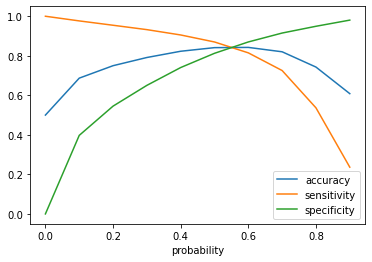

In [60]:
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [61]:
#WE can See that optimum cut-off lies between 0.4 and 0.6 which is 0.5.
#Lets consider that cu-off in range of 10
cut_off=0.5
num=[round(cut_off+0.01*i,3) for i in range(10)]
print(num)
for i in num:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

[0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59]


,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.126696,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.469343,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.321710,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.522600,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0
4,0,0.556257,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,0


In [62]:
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

for i in num:
    cm = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm))
    acc= (cm[0,0]+cm[1,1])/total1
    
    spec = cm[0,0]/(cm[0,0]+cm[0,1])
    sens = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i ,acc,sens,spec]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50         0.50  0.841171     0.869815     0.812526
0.51         0.51  0.842363     0.865720     0.819007
0.52         0.52  0.842830     0.861365     0.824295
0.53         0.53  0.842933     0.855662     0.830205
0.54         0.54  0.842985     0.850218     0.835753
0.55         0.55  0.843374     0.844618     0.842130
0.56         0.56  0.842908     0.838241     0.847574
0.57         0.57  0.842985     0.832020     0.853951
0.58         0.58  0.843478     0.826628     0.860328
0.59         0.59  0.842959     0.821236     0.864683


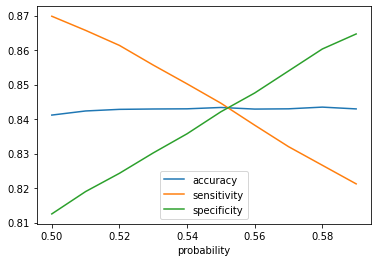

In [63]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [64]:
#From the above graph we can conclude, the optimal cutoff point in the probability to define the 
#predicted churn variabe converges at 0.55
y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.55 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.126696,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.469343,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.321710,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.522600,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
4,0,0.556257,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,0,1


In [65]:
# accuracy
print("Accuracy :",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

Accuracy : 0.8433741186229781


In [66]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt6,total_rech_amt7,arpu_67,total_rech_data_8_<=10_Recharges,total_rech_data_8_10-25_Recharges,total_rech_data_8_>25_Recharges,total_rech_num_8_<=10_Recharges,total_rech_num_8_10-25_Recharges,total_rech_num_8_>25_Recharges,tenure_6.12M,tenure_12.24M,tenure_24.60M,tenure_60+M
10747,0.026143,0.021027,0.000000,0.000070,0.003412,0.000575,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000249,0.000000,0.000000,0.003565,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.001734,0.000000,0.000000,0.001402,0.000000,0.000000,0.0,0.019587,0.000000,0.000054,0.0,0.000000,0.004941,0.000000,0.000000,0.0,0.0,0.017204,0.000489,0.000053,0.001493,0.001937,0.000162,0.003225,0.002280,0.002466,0.000077,0.000000,0.002178,0.003321,0.003182,0.002782,0.000000,0.000041,0.000023,0.001853,0.000000,0.010098,0.0,0.0,0.0,0.001572,0.000036,0.009587,0.0,0.018753,0.000000,0.000053,0.000000,0.000000,0.0,0.000000,0.0,0.016287,0.050725,0.022444,0.006234,0.002248,0.004239,0.002494,0.000000,0.000000,0.000000,0.008393,0.041051,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.02381,0.104167,0.000000,0.000000,0.0000,0.000000,0.0,0.0,0.014493,0.000000,0.000000,0.000000,0.002203,0.012662,0.059622,0,0,0,1,0,0,1,0,0,0
12573,0.048190,0.005702,0.005250,0.002058,0.011146,0.023873,0.007510,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.006489,0.004028,0.002058,0.000516,0.003132,0.005379,0.000000,0.001285,0.000409,0.000000,0.036826,0.0,0.004151,0.005882,0.003767,0.010557,0.004741,0.018985,0.0,0.010802,0.018971,0.006132,0.0,0.000000,0.020936,0.000000,0.000000,0.0,0.0,0.012674,0.024301,0.009067,0.025150,0.049448,0.023064,0.002868,0.011624,0.005979,0.000000,0.000000,0.000000,0.023235,0.051159,0.022029,0.003628,0.011922,0.005535,0.018785,0.038543,0.004938,0.0,0.0,0.0,0.019560,0.030083,0.008684,0.0,0.000000,0.000000,0.000000,0.006005,0.000000,0.0,0.012541,0.0,0.009772,0.043478,0.049875,0.037406,0.032592,0.049875,0.021446,0.011238,0.093248,0.035705,0.002835,0.002872,0.004586,0.001774,0.029730,0.009727,0.00,0.0,0.0,0.02381,0.000000,0.000000,0.071429,0.0625,0.034483,0.0,0.0,0.275362,0.019572,0.057999,0.000000,0.008444,0.009309,0.075152,1,0,0,1,0,0,0,0,1,0
29677,0.061230,0.003275,0.037889,0.008157,0.010851,0.025458,0.018789,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.003757,0.041765,0.008157,0.018946,0.054062,0.073716,0.001375,0.001002,0.001831,0.000000,0.000000,0.0,0.010778,0.071808,0.031784,0.000024,0.000000,0

In [67]:
# Feature selection
X_test=X_test[rfe_cols_two]
X_test.head()

,arpu_8,onnet_mou_7,offnet_mou_7,roam_og_mou_8,loc_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_8,loc_ic_mou_8,std_ic_mou_8,spl_ic_mou_8,max_rech_amt_6,last_day_rch_amt_8,av_rech_amt_data_8,vol_2g_mb_8,monthly_2g_8,aug_vbc_3g,arpu_67
10747,0.026143,0.000000,0.000575,0.000000,0.000000,0.000053,0.000162,0.003225,0.002466,0.002782,0.009587,0.000000,0.022444,0.000000,0.000000,0.000000,0.0,0.000000,0.059622
12573,0.048190,0.005250,0.023873,0.000000,0.003767,0.009067,0.023064,0.002868,0.005979,0.022029,0.008684,0.000000,0.049875,0.011238,0.035705,0.004586,0.0,0.019572,0.075152
29677,0.061230,0.037889,0.025458,0.000000,0.031784,0.024987,0.046670,0.055421,0.180698,0.183375,0.003706,0.000000,0.062843,0.029220,0.124107,0.056568,0.0,0.211621,0.095894
8856,0.042998,0.000963,0.003828,0.000000,0.000000,0.000800,0.000000,0.002576,0.000000,0.000037,0.011386,0.000000,0.044638,0.034615,0.063039,0.008221,0.2,0.068735,0.070960
21098,0.098384,0.011111,0.242612,0.031491,0.017644,0.157573,0.012298,0.028465,0.068991,0.066205,0.002352,0.080257,0.027431,0.029220,0.005664,0.000000,0.0,0.000000,0.101081


In [68]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 10747    0.729211
12573    0.455313
29677    0.000126
8856     0.173737
21098    0.004924
17458    0.164539
1476     0.022317
5120     0.701625
18338    0.734156
28280    0.355066
dtype: float64


In [69]:
y_test_pred = res.predict(X_test_SM)
y_pred = pd.DataFrame(y_test_pred)
y_pred=y_pred.rename(columns = {0:"cp"})
y_test_df = pd.DataFrame(y_test)
print(y_pred.head())
print(y_test_df.head())

             cp
10747  0.729211
12573  0.455313
29677  0.000126
8856   0.173737
21098  0.004924
       Churn
10747      0
12573      0
29677      0
8856       0
21098      0


In [70]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final['test_churn_pred'] = y_pred_final.cp.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,Churn,cp,test_churn_pred
10747,0,0.729211,1
12573,0,0.455313,0
29677,0,0.000126,0
8856,0,0.173737,0
21098,0,0.004924,0


In [71]:
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.test_churn_pred)

0.8286857015887124

In [72]:
confusion_test = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion_test)

Confusion Matrix
 [[6872 1400]
 [ 142  587]]


In [73]:
confuse_matrix(confusion_test)

Sens: 0.8052126200274349
Spec: 1.8945841392649903
FPR: 0.16924564796905223
Prec: 0.2954202315047811
TNR: 0.9797547761619618


In [74]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.Churn,y_pred_final.cp, drop_intermediate = False )
test_auc=calc_auc(y_pred_final.Churn,y_pred_final.cp)
print(train_auc, test_auc)

0.9024789828125996 0.8717497406425697


##### The AUC score for train dataset is 0.90 and the test dataset is 0.87.
##### This model can be considered as a good model.

## Logistic Regression With PCA

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print(X_train.shape)
print(X_test.shape)
from imblearn.over_sampling import SMOTE
smte = SMOTE(random_state=42)
X_train_sm,y_train_sm = smte.fit_resample(X_train,y_train)

(21000, 122)
(9001, 122)


In [76]:
#importing PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

In [77]:
#applying PCA on train data
pca.fit(X_train_sm)

PCA(random_state=42)

In [78]:
X_train_sm_pca=pca.fit_transform(X_train_sm)
print(X_train_sm_pca.shape)
X_test_pca=pca.transform(X_test)
print(X_test_pca.shape)

(38576, 122)
(9001, 122)


In [79]:
pca.components_

array([[ 5.90023457e-02, -2.23603157e-02, -1.48705157e-02, ...,
         5.18193866e-06,  4.18975714e-06,  3.45550382e-08],
       [ 9.85522777e-02,  1.75141677e-01,  1.75994702e-01, ...,
         8.89998929e-06,  6.68435345e-06, -2.36077556e-07],
       [-9.93021789e-02,  4.43766385e-02, -4.39299554e-02, ...,
        -8.44369577e-06, -1.56452555e-05, -3.63451085e-07],
       ...,
       [ 6.64447151e-08, -1.47889754e-06,  5.11817520e-08, ...,
         4.94658485e-05, -1.04251247e-05,  5.80762002e-05],
       [ 8.10140377e-08, -2.19028062e-06, -8.04862149e-07, ...,
         5.16662634e-05, -1.03202912e-05,  1.19096685e-04],
       [-3.12648108e-07, -1.24138287e-06, -5.22461454e-07, ...,
        -7.27640863e-05,  2.86242027e-05,  1.47483340e-04]])

### Performing Logistic Regression using PCA

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_sm_pca, y_train_sm)
y_pred = logreg_pca.predict(X_test_pca)
y_pred_df = pd.DataFrame(y_pred)
print(y_pred_df.shape)

(9001, 1)


In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matirx for y_test and y_pred\n",confusion_matrix(y_test,y_pred),"\n")
print("Accuracy LR Model with PCA: ",accuracy_score(y_test,y_pred))

Confusion Matirx for y_test and y_pred
 [[6826 1446]
 [ 129  600]] 

Accuracy LR Model with PCA:  0.8250194422841907


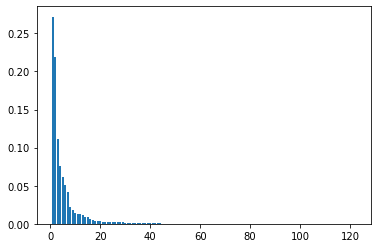

In [82]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

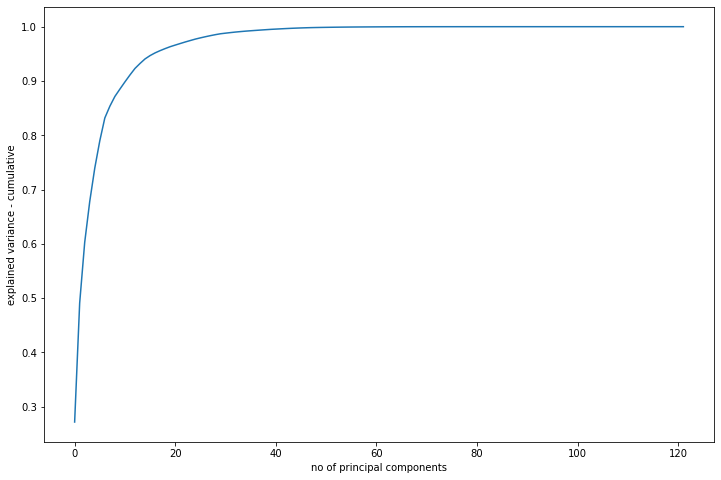

In [83]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.plot(var_cumu)
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [84]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([27.2, 49.1, 60.3, 67.8, 73.9, 78.9, 83.1, 85.3, 87.1, 88.5, 89.8,
       91.1, 92.3, 93.2, 94. , 94.6, 95.1, 95.5, 95.9, 96.2, 96.5, 96.8,
       97.1, 97.4, 97.7, 97.9, 98.1, 98.3, 98.5, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.7, 99.7, 99.7, 99.7,
       99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7,
       99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7,
       99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7,
       99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7,
       99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7,
       99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7,
       99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7,
       99.7])

In [85]:
pca_8 = PCA(n_components=15)

train_pca_8 = pca_8.fit_transform(X_train_sm)
print(train_pca_8.shape)

test_pca_8 = pca_8.transform(X_test)
print(test_pca_8.shape)

(38576, 15)
(9001, 15)


In [86]:
logreg_pca_8 = LogisticRegression()
logreg_pca_8.fit(train_pca_8, y_train_sm)

# making the predictions
y_pred_8 = logreg_pca_8.predict(test_pca_8)

# converting the prediction into a dataframe
y_pred_df_8 = pd.DataFrame(y_pred_8)
print(y_pred_df_8.shape)

(9001, 1)


In [87]:
# Checking the Confusion matrix
print("Confusion Matirx for y_test and y_pred\n",confusion_matrix(y_test,y_pred_8),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy LR model with PCA: ",accuracy_score(y_test,y_pred_8))

Confusion Matirx for y_test and y_pred
 [[6364 1908]
 [ 152  577]] 

Accuracy LR model with PCA:  0.7711365403844017


#### The machine learning logistic regression model is able to predict the customer churn with 84 % accuracy.
#### The customer churn is minimum with customers with tenure> 5 years and the churn is highest with customers with tenure < 6 months.
#### The customer churn decreases if the number of recharge >=10 every month. 
#### The features having maximum influence as per the 8th month are :
	Local Incoming calls minutes
	Local incoming call from Operator T to other operators
	Local incoming calls with same T operator
	Average revenue per user